In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


In [21]:
canv = ROOT.TCanvas("canv","canv",900,450)
tuple_lc = "pKpi/Yc"
tup_lc = ROOT.TChain ( tuple_lc ) 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


In [22]:
ganga_path = "./" # for MagDown
file_name  = "/output/MC.root"
dirs = [177,179]
for d in dirs:
    if d==177:
        sd=54
    if d==179:
        sd=62
    for sdi in range(sd):
        full_path = ganga_path + str(d)+"/"+str(sdi)+file_name
        tup_lc.Add(full_path)

In [23]:
tree = tup_lc

In [24]:
im  = ROOT.RooRealVar("im","im",2.24,2.33)
lgi = ROOT.RooRealVar("lgi","lgi",-2,2)
arg_set = ROOT.RooArgSet( im , lgi )
ds = ROOT.RooDataSet("ds","ds",arg_set)

In [25]:
cut_sel  = " NNp>0.5 && NNkm>0.1 && NN3>0.1 "
cut_sel += " && ct_yc>0.1 && ct_yc<0.5 "
cut_sel += " && p_p>10   && p_p<100 "
cut_sel += " && p_km>3.2 && p_km<150 "
cut_sel += " && p_3>3.2  && p_3<150 "
#
cut_trg  = ""
cut_trg += " &&  (hd_l0tos&2)==2 "
cut_trg += " &&  (hd_l1tos&2)==2 "
cut_trg += " &&  (hd_l2tos&2)==2 "
#
cuts = cut_sel + cut_trg
#

In [26]:
from math import log10
for ev in tree.withCuts(cut_sel):
    im.setVal(ev.im_yc)
    lgi.setVal(log10(ev.c2ip_yc))
    ds.add(arg_set)
print(ds)

+RooDataSet("ds"):52464 entries, 2 variables---------+-------+-------+
|   Variable    |  Description  |  mean   |   rms    |  min  |  max  |
+---------------+---------------+---------+----------+-------+-------+
| 1. im         | im            | +2.2878 | 0.009655 | +2.24 | +2.33 |
| 2. lgi        | lgi           | +0.2442 | 0.58677  |    -2 | +2    |
+---------------+---------------+---------+----------+-------+-------+


17477.333333333332
34954.666666666664


Warning in <TROOT::Append>: Replacing existing TH1: h_1010 (Potential memory leak).


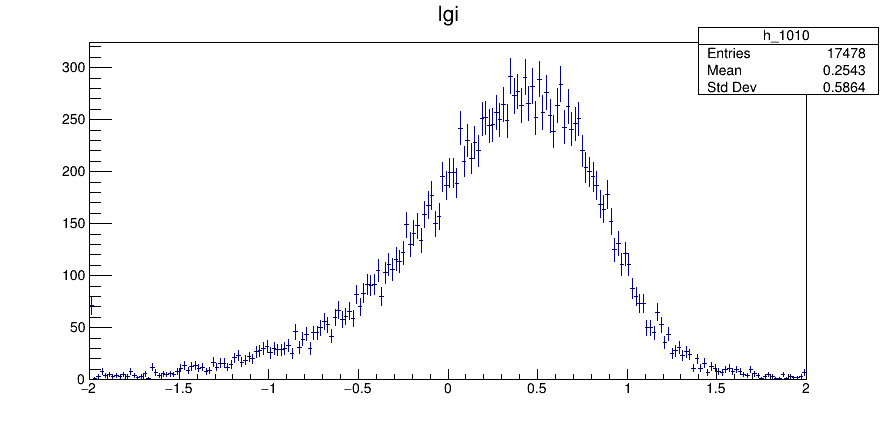

In [86]:
print(52432./3.)
print(2.*52432./3.)
#ds.draw("lgi","im<2.2856861")
ds.draw("lgi","im>2.290233")
canv.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_1020 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1000 (Potential memory leak).


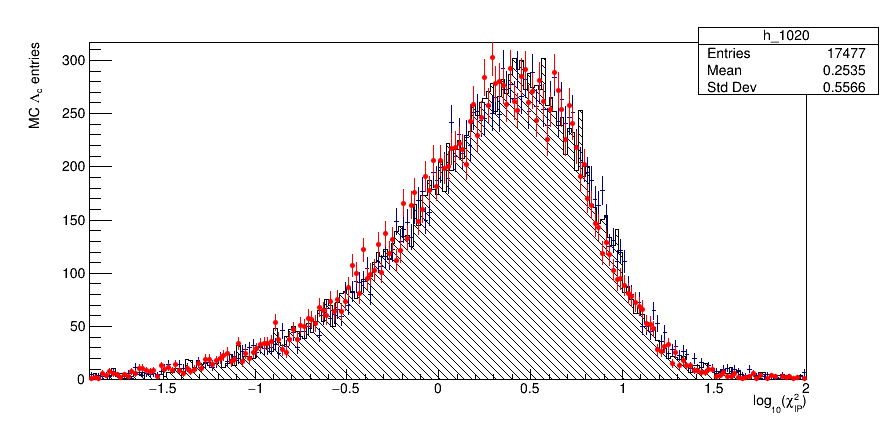

In [106]:
th1 = ds.draw("lgi","im<2.2856861")
th1.SetLineColor(1)
th1.SetFillColor(1)
th1.SetFillStyle(3005)
th1.SetTitle(" ")
th1.GetXaxis().SetRangeUser(-1.9,2)
th1.GetXaxis().SetTitle("log_{10}(#chi^{2}_{IP})")
th1.GetYaxis().SetTitle("MC #Lambda_{c} entries")
th2 = ds.draw("lgi","im>2.2856861 && im<2.290233")
th2.SetLineColor(2)
th2.SetMarkerColor(2)
th2.SetMarkerStyle(20)
th2.SetMarkerSize(0.5)
th3 = ds.draw("lgi","im>2.290233")
th2.SetMarkerStyle(24)
th2.SetMarkerSize(0.5)
th1.Draw("hist")
th2.Draw("same")
canv.Draw()